# CNN Prediction

In [96]:
import os
import re
import copy
import random
import datetime
import tensorflow as tf
print("Tensorflow version " + tf.__version__)
import pandas as pd

import PIL
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import sklearn

from __future__ import print_function
import keras
import keras.preprocessing
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

Tensorflow version 2.2.0


In [11]:
os.environ['CUDA_VISIBLE_DEVICES'] = "1"
physical_devices = tf.config.experimental.list_physical_devices('GPU') 
physical_devices

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Functions

In [12]:
def fileToList(file_name):
    result_list = [] 
    fp = open(file_name)
    for row in fp:
        row = row.strip()
        row = row.replace("\"","")
        row = re.split('\t',row)
        #row = re.split(r'[;,\s]\s*', row)
        result_list.append(row)
    fp.close()  
    return result_list 

In [13]:
def showImg(img_data):
    if type(img_data) is list:
        image = tf.keras.preprocessing.image.load_img(img_data)
        plt.imshow(image)
    if type(img_data) is np.ndarray:
        image = tf.keras.preprocessing.image.array_to_img(img_data)
        plt.imshow(image)

In [14]:
def resizeCropImg(img_file, target_width, target_height):
    image = tf.keras.preprocessing.image.load_img(img_file)
    width, height = image.size
    left   = width*0.13
    top    = height*0.13
    right  = width*0.87
    bottom = height*0.87
    image = image.crop((left, top, right, bottom))
    image = image.resize((target_width, target_height))
    return image

In [15]:
def loadImgs(cnv_list, img_width, img_height):
    cnv_np = np.zeros((len(cnv_list), img_width, img_height, 3))
    for index, each_cnv in enumerate(cnv_list):
        if index % 1000 == 1:
            time_stamp = datetime.datetime.now()
            time_str   = time_stamp.strftime('%Y.%m.%d-%H:%M:%S')
            print("[%s] Processing %d ..."%(time_str, index))
        cnv_img = resizeCropImg(each_cnv, img_width, img_height)
        cnv_np[index] = tf.keras.preprocessing.image.img_to_array(cnv_img)
    time_stamp = datetime.datetime.now()
    time_str   = time_stamp.strftime('%Y.%m.%d-%H:%M:%S')
    print("[%s] Done %d."%(time_str, index))
    return cnv_np

In [16]:
def pred_roc_data(model, img, label_one_hot):
    pred_keras = model.predict(img).ravel() # ravel(): Flatten the array
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(label_one_hot.ravel(), pred_keras) 
    auc_keras = auc(fpr_keras, tpr_keras)
    return fpr_keras, tpr_keras, auc_keras

# Processing

In [ ]:
img_width, img_height = 224, 224

In [ ]:
# ## For rare deletions
# true_file = '/home/rt2776/cnv_espresso/images_rare/true_del_image_info.list'
# false_file = '/home/rt2776/cnv_espresso/images_rare/false_del_image_info.list'

In [ ]:
# ## For rare duplications
# true_file = '/home/rt2776/cnv_espresso/images_rare/true_dup_image_info.list'
# false_file = '/home/rt2776/cnv_espresso/images_rare/false_dup_image_info.list'

In [ ]:
# ## For splited rare deletions
# true_file  = '/home/rt2776/cnv_espresso/images_rare/data_backup/true_rare_del_splits.list'
# false_file = '/home/rt2776/cnv_espresso/images_rare/data_backup/false_rare_del_splits.list'

In [ ]:
# ## For splited rare duplications
# true_file  = '/home/rt2776/cnv_espresso/images_rare/data_backup/true_rare_dup_splits.list'
# false_file = '/home/rt2776/cnv_espresso/images_rare/data_backup/false_rare_dup_splits.list'

### Loading cnv image file paths to list

In [ ]:
# true_cnv_df  = pd.read_csv(true_file,  header=0,sep='\t')
# false_cnv_df = pd.read_csv(false_file, header=0,sep='\t')

In [ ]:
# true_images_path_list  = true_cnv_df['image_path']
# false_images_path_list = false_cnv_df['image_path']

In [ ]:
## For file with image path only:

# true_list = [each_file[0] for each_file in fileToList(true_file)]
# false_list = [each_file[0] for each_file in fileToList(false_file)]
# len(true_list), len(false_list)

### Loading images from list to numpy array

In [ ]:
# false_img_np = loadImgs(false_images_path_list, img_width, img_height)
# false_img_np.shape

In [ ]:
# true_img_np = loadImgs(true_images_path_list, img_width, img_height)
# true_img_np.shape

### Generage labels

In [ ]:
# true_label = [1 for i in range(0,len(true_img_np))]
# false_label = [0 for i in range(0,len(false_img_np))]
# print(true_label[0:5], false_label[0:5])
# print(len(true_label), len(false_label))

### Combine true & false data

In [ ]:
# combined_cnv_info_df = true_cnv_df.append(false_cnv_df, ignore_index=True)
# #combined_cnv_info_index = list(range(len(combined_cnv_info_df)))
# combined_img_np = np.vstack((true_img_np, false_img_np))
# combined_label = true_label + false_label

In [ ]:
# combined_cnv_info_df.shape, true_cnv_df.shape, false_cnv_df.shape

### Backup or restore

In [17]:
backup_path = '/home/rt2776/cnv_espresso/images_rare/data_backup/'
# os.makedirs(backup_path, exist_ok=True)

In [ ]:
## Backup

# project_name = 'rare_entire_del'
# combined_cnv_info_df.to_csv(backup_path+'rare_del_entire_cnv_info.csv')
# np.save(backup_path+'rare_del_entire_img', combined_img_np)
# np.save(backup_path+'rare_del_entire_label', combined_label)

# project_name = 'rare_entire_dup'
# combined_cnv_info_df.to_csv(backup_path+'rare_entire_dup_info.csv')
# np.save(backup_path+'rare_entire_dup_img', combined_img_np)
# np.save(backup_path+'rare_entire_dup_label', combined_label)

In [ ]:
## Restore for entire del or dup

# project_name = 'rare_entire_del'
# project_name = 'rare_entire_dup'

if project_name == 'rare_entire_del' or project_name == 'rare_entire_dup':
    combined_img_np = np.load(backup_path + project_name + '_img.npy')
    combined_label = np.load(backup_path + project_name + '_label.npy')
    combined_cnv_info_df = pd.read_csv(backup_path+project_name+'_info.csv')

In [18]:
## Restore for split del or dup

# project_name = 'rare_split_del'
project_name = 'rare_split_dup'

if project_name == 'rare_split_del' or project_name == 'rare_split_dup':
    combined_img_np = np.load(backup_path + project_name + '_img.npy')
    combined_label  = np.load(backup_path + project_name + '_label.npy')
    try:
        del combined_cnv_info_df
    except:
        pass

In [19]:
print("Project: '%s' dataset loaded."%project_name)
print("  -- Shape of image array: ", combined_img_np.shape)
print("  -- Shape of label      : ", combined_label.shape)
try:
    print("  -- Shape of CNV info   : ", combined_cnv_info_df.shape)
except:
    print("There is no CNV info data for split del or dup.")

Project: 'rare_split_dup' dataset loaded.
  -- Shape of image array:  (72896, 224, 224, 3)
  -- Shape of label      :  (72896,)
There is no CNV info data for split del or dup.


## Normalization

In [ ]:
# Find the shape of input images and create the variable input_shape
nRows,nCols,nDims = train_img.shape[1:]
input_shape = (nRows, nCols, nDims)
print("The shape of input tensor:",input_shape)

In [ ]:
# Change to float datatype
train_img = train_img.astype('float32')
val_img   = val_img.astype('float32')
test_img  = test_img.astype('float32')

# Scale the data to lie between 0 to 1
train_img /= 255
val_img   /= 255
test_img  /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_label)
val_labels_one_hot   = to_categorical(val_label)
test_labels_one_hot  = to_categorical(test_label)

In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(train_label)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

In [ ]:
#np.where(test_label==0)

In [ ]:
item = random.randint(0,len(train_label))
print(train_label[item])
showImg(train_img[item])

### ROC curve

In [20]:
print(project_name)

rare_split_dup


In [21]:
## Load pre-calculated model
model_path  = '/home/rt2776/cnv_espresso/model_h5/'

common_cnn_model_path = model_path + project_name + '_model.h5'
common_cnn_model = keras.models.load_model(common_cnn_model_path)

MobileNet_model_path = model_path + project_name + '_MobileNet_v1.h5'
MobileNet_model = keras.models.load_model(MobileNet_model_path)

ResNet50_model_path = model_path + project_name + '_ResNet50.h5'
ResNet50_model = keras.models.load_model(ResNet50_model_path)

In [ ]:
MobileNet_model.evaluate(test_img, test_labels_one_hot)

In [ ]:
common_cnn_model.evaluate(test_img, test_labels_one_hot)

In [ ]:
fpr_MobileNet, tpr_MobileNet, auc_MobileNet = pred_roc_data(MobileNet_model, test_img, test_labels_one_hot)
fpr_ResNet50,  tpr_ResNet50,  auc_ResNet50  = pred_roc_data(ResNet50_model,  test_img, test_labels_one_hot)
fpr_common_cnn,tpr_common_cnn,auc_common_cnn= pred_roc_data(common_cnn_model,test_img, test_labels_one_hot)

In [ ]:
plt.figure(1) #,dpi=300
plt.tick_params(labelsize="x-large")
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_MobileNet, tpr_MobileNet, label='MobileNet_v1(area = {:.3f})'.format(auc_MobileNet))
plt.plot(fpr_ResNet50,  tpr_ResNet50,  label='ResNet50 (area = {:.3f})'.format(auc_ResNet50))
plt.plot(fpr_common_cnn,tpr_common_cnn,label='Common CNN (area = {:.3f})'.format(auc_common_cnn))
plt.xlabel('False positive rate',fontsize="xx-large")
plt.ylabel('True positive rate',fontsize="xx-large")
plt.title('ROC curve',fontsize="xx-large")
plt.legend(loc='best',fontsize="large")
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.tick_params(labelsize="x-large")
plt.xlim(0, 0.3)
plt.ylim(0.7, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_MobileNet, tpr_MobileNet, label='MobileNet_v1(area = {:.3f})'.format(auc_MobileNet))
plt.plot(fpr_ResNet50,  tpr_ResNet50,  label='ResNet50 (area = {:.3f})'.format(auc_ResNet50))
plt.plot(fpr_common_cnn,tpr_common_cnn,label='Common CNN (area = {:.3f})'.format(auc_common_cnn))
plt.xlabel('False positive rate',fontsize="xx-large")
plt.ylabel('True positive rate',fontsize="xx-large")
plt.title('ROC curve (zoomed in at top left)',fontsize="xx-large")
plt.legend(loc='best',fontsize="large")
plt.show()

## Precision

In [ ]:
model_name = "common_cnn"
model = common_cnn_model

# model_name = "MobileNet"
# model = MobileNet_model

# model = ResNet50_model

In [ ]:
test_pred = model.predict(test_img)

In [ ]:
test_output_df = copy.deepcopy(test_cnv_info_df)
test_output_df.shape

In [ ]:
test_output_df.insert(test_output_df.shape[1], 'Prob_True', "")
test_output_df.insert(test_output_df.shape[1], 'Prob_False', "")
test_output_df.insert(test_output_df.shape[1], 'Prediction', "")
test_output_df.insert(test_output_df.shape[1], 'Pred_status', "")

In [ ]:
test_output_df.shape,test_pred.shape, test_cnv_info_df.shape, len(test_cnv_info_df), test_img.shape

In [ ]:
num, correct_count = 0, 0
for i in range(len(test_pred)):
    num += 1
    test_output_df.iloc[i,test_output_df.columns.get_loc('Prob_False')] = test_pred[i][0]
    test_output_df.iloc[i,test_output_df.columns.get_loc('Prob_True')] = test_pred[i][1]

    if(np.argmax(test_pred[i]) == 0):
        test_output_df.iloc[i,test_output_df.columns.get_loc('Prediction')] = "Negative"
    else:
        test_output_df.iloc[i,test_output_df.columns.get_loc('Prediction')] = "Positive"
        
    if(np.argmax(test_pred[i]) == test_label[i]):
        test_output_df.iloc[i,test_output_df.columns.get_loc('Pred_status')] = "Correct"
        correct_count += 1
    else:
        test_output_df.iloc[i,test_output_df.columns.get_loc('Pred_status')] = "Wrong"
#     print(num, test_pred[i], test_label[i], pred_status)
score = correct_count/len(test_pred)
print('Accuracy for testing data: %.2f%s' % (score*100,'%'))

In [ ]:
## output to file
output_path = '/home/rt2776/cnv_espresso/output/'
test_output_df.to_csv(output_path+project_name+'_'+model_name +'_test_predict_info.csv',index=False)

In [ ]:
test_output_df[test_output_df['Pred_status']=='Wrong']

In [ ]:
test_output_df[test_output_df['SAMPLE']=='SP0009081'] 

In [ ]:
test_output_df.index=range(len(test_output_df))

In [ ]:
#i=random.randrange(len(test_img))
i=random.choice(test_output_df[test_output_df['Pred_status']=='Wrong'].index)
showImg(test_img[i]), 
print(test_label[i], test_pred[i],  test_output_df.iloc[i,:])

### Predict specific images

In [41]:
# ## For splited rare duplications
true_file  = '/home/rt2776/cnv_espresso/images_rare/data_backup/true_rare_dup_splits.list'
false_file = '/home/rt2776/cnv_espresso/images_rare/data_backup/false_rare_dup_splits.list'

In [59]:
true_cnv_df  = pd.read_csv(true_file,  header=None,sep='\t')
false_cnv_df = pd.read_csv(false_file, header=None,sep='\t')

In [90]:
true_cnv_df.columns = ['image_path']
false_cnv_df.columns = ['image_path']

In [148]:
#specific_images_path_df = false_cnv_df[false_cnv_df['image_path'].str.contains('SP0009081')]
specific_images_path_df = true_cnv_df[true_cnv_df['image_path'].str.contains('SP0077668_2_172795024')]
specific_images_path_list = specific_images_path_df['image_path']
specific_images_path_list

36990    /home/rt2776/cnv_espresso/images_rare/true_dup...
37004    /home/rt2776/cnv_espresso/images_rare/true_dup...
37014    /home/rt2776/cnv_espresso/images_rare/true_dup...
Name: image_path, dtype: object

In [149]:
img_width, img_height = 224, 224
specific_img_np = loadImgs(specific_images_path_list, img_width, img_height)

[2021.02.03-08:30:11] Processing 1 ...
[2021.02.03-08:30:11] Done 2.


In [150]:
specific_img_np.shape

(3, 224, 224, 3)

In [151]:
specific_img_np = specific_img_np.astype('float32')
specific_img_np /= 255

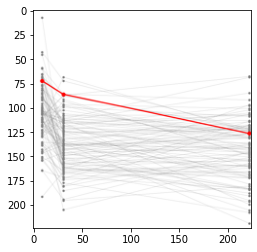

In [154]:
showImg(specific_img_np[2])

In [155]:
MobileNet_model.predict(specific_img_np)

array([[0.42545325, 0.57454675],
       [0.4008454 , 0.5991546 ],
       [0.40723342, 0.59276664]], dtype=float32)

In [158]:
np.argmax(MobileNet_model.predict(specific_img_np)[2])

1

### TODO:
- Check the performance on different size categories on test data firstly and by k-fold cross validation secondly. 

## Reference:
- Load image: https://keras.io/api/preprocessing/image/#load_img-function
- Model example: https://towardsdatascience.com/covolutional-neural-network-cb0883dd6529
- Transfer learning and toy demo: https://zhuanlan.zhihu.com/p/51889181
- K-fold validation: https://medium.com/the-owl/k-fold-cross-validation-in-keras-3ec4a3a00538
- ROC curve: https://medium.com/hackernoon/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier-2ecc6c73115a